In this demo, we will see how the Wigner semicircle distribution arises when we consider the distributions of eigenvalues for large symmetric matrices using a numerical approach.

The Wigner semicircle distribution is defined as follows:

$$ f(x)={2 \over \pi R^2}\sqrt{R^2-x^2\,} $$

It is a normalized semi-ellipse centred at x = 0.

The distribution of the eigenvalues for real symmetric matrices will follow this distribution, along with some eigenvalues centred around a higher value which is correlated with the dimensions of the matrix. 

The number of eigenvalues centred around the higher value grow vanishingly small compared to the number around the origin as the dimensions of the matrix grows, and the overall distribution tends towards a Wigner semicircle.

To simulate this happening, we will start by creating an array of many eigenvalues of random symmetric matrices.

We will create these random symmetric matrices, we create a random matrix of given dimensions, and then add it to its transpose. The eigenvalues of this matrix are then recorded, and this procedure is repeated. This procedure may take a while, and num_matrices or matrix_dimensions can be reduced if your machine is having trouble.

In [1]:
# coding: utf-8
%matplotlib notebook
import numpy as np
import math
import matplotlib.pyplot as plt
from __future__ import print_function, division
from scipy.optimize import *
from scipy.ndimage.filters import *

num_matrices = 50
matrix_dimensions = 500
eigenvalues = []

for __ in range(0, num_matrices):
    matrix = np.random.rand(matrix_dimensions, matrix_dimensions)
    sym_matrix = matrix + matrix.T
    eigenvalues.extend(np.linalg.eig(sym_matrix)[0])

We will then define a Wigner semicircle function, then fit it to the actual data.

When we fit the Wigner semicircle function, we must be careful to remove the higher peak from the data, else the numpy curve_fit function does not work.

Finally, the result will be plotted, which should show that the eigenvalues of the matrices is well approximated by the Wigner semicircle distribution.

<IPython.core.display.Javascript object>


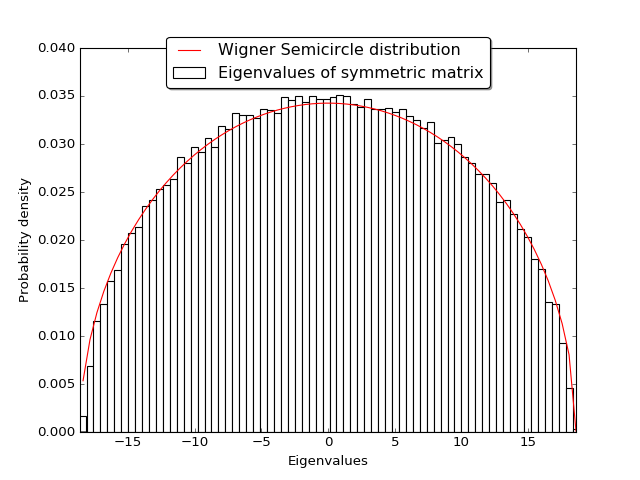

R = 18.5836524266


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [10]:
wigner = (lambda x, R: (2/(math.pi * R**2)) * np.sqrt(R**2 - x**2))
y, x, __ = plt.hist(eigenvalues, 1000, normed = True, facecolor='white', label = "Eigenvalues of symmetric matrix")
x = uniform_filter1d(x, size = 2)
x = np.delete(x, 0)

y_new = y[np.where(y != 0.0)]
x = x[np.where(y != 0.0)]

y_new = y_new[np.where(x <= matrix_dimensions/2)]
x_new = x[np.where(x <= matrix_dimensions/2)]

ax = plt.subplot()
params, __ = curve_fit(wigner, x_new, y_new, p0 = [100.])
wigner_plot = plt.plot(x, wigner(x, params[0]), color = 'red', label = "Wigner Semicircle distribution")
ax.set_xlim([-abs(params[0]), abs(params[0])])
# Comment the above line to see not only the Wigner Semicircle part of the distribution, but also the peak at the higher value.
plt.ylabel('Probability density')
plt.xlabel('Eigenvalues')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True, shadow=True)
print("R = " + str(abs(params[0])))
plt.show()